In [1]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
from time import clock
from scipy.sparse import  spdiags

Autosaving every 300 seconds


# Equation de la chaleur
On va étudier la manière d'approcher l'équation de la chaleur. Celle-ci décrit les phénomènes transitoires (instationnaires) en temps d'un phénomène de diffusion.

On introduit d'abord un problème elliptique qui décrit le phénomène de diffusion stationnaire. On reprend le problème de Dirichlet étudié précédemment:
$$
\begin{align}
&-u_l''(x)=f(x),\quad \forall x\in ]0,L[,\\
&u_l(0)=u_l(L)=0.
\end {align}
$$
Le modèle parabolique décrit par l'équation de la chaleur s'écrit,
$$
\begin{align}
&\partial_t u(t,x)-\partial_{xx}u(t,x)=f(t,x),\quad \forall x\in ]0,L[,\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0.
\end {align}
$$
## Rappel de propriétés 
On rappelle (cours) que, sous réserve de régularité de $f$, la solution satisfait l'estimation suivante, il existe $a>0$ tel que
$$
\|u(t,.)\|^2_{L^2((0,L))}\le \|u_0\|^2_{L^2((0,L))}e^{-a t}
+\int_0^t e^{-a (t-s)}\|f(s,x)\|^2_{L^2((0,L))}.
$$
On observe le caractère amorti de l'équation grâce à l'ellipticité de l'opérateur de Dirichlet. Si de plus $f$ ne dépend pas de $t$, on note $v(t,x)=u(t,x)-u_l(x)$ et $v$ satisfait,
$$
\begin{align}
&\partial_t v(t,x)-\partial_{xx}v(t,x)=0,\quad \forall x\in ]0,L[,\\
&v(t,0)=v(t,L)=0,~\forall t>0.
\end {align}
$$
On en déduit alors que
$$
\|v(t,.)\|^2_{L^2((0,L))}\le \|v(0,.)\|^2_{L^2((0,L))}e^{-a t}.
$$
On observe l'amortissement de $v$ vers $0$ soit l'amortissement de $u$ vers $u_l$. La solution du problème stationnaire est l'asymptotique du problème instationnaire, quelle que soit la donnée initiale.

## Schémas en temps Euler implicite
On propose le schéma d'Euler implicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n+1}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
On remarque qu'il s'agit d'une suite de problèmes elliptiques, ainsi la suite est bien définie dans $H^1_0((0,L))$ à partir du rang $1$ dès lors que $v_0\in H^{-1}((0,L))$.
En prenant le produit scalaire $L^2((0,L))$ de cette équation avec $v^{n+1}$ et en utilisant l'inégalité de Poincaré, on a,
$$
(1+a\delta t)\|v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n+1}\|_{L^2((0,L))}^2+2\delta t\|\partial_x v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n}\|_{L^2((0,L))}^2.
$$
On en déduit la convergence vers $0$, sous-géométrique, de $(v^n)_n$ dans $L^2((0,L))$.

Ceci établit la stabilité asymptotique $L^2((0,L))$ du schéma, **inconditonnellement sur le pas de temps**.
## Schémas en temps Euler explicite
On propose le schéma d'Euler explicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
La suite perd $2$ crans de régularité Sobolev à chaque itération. Pour donner de bonnes propriétés à ce schéma, il sera nécessaire de le définir pour une discrétisation spatiale et de respecter une condition CFL qui limite le pas de temps en fonction du pas d'espace.

On introduit la discrétisation uniforme du segment $]0,L[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac L {N+1}$.
On rappelle l'expression de la matrice de discrétisation par différence finie centrée,
$$
A=\frac 1 {h^2}\left (\matrix{&2&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&2}\right ).
$$
Le schéma discrétisé en temps et en espace s'écrit, avec $V^n\in \mathbb R^N$,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A V^{n}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t.
\end {align}
$$
On sait, cf cours, que ce schéma est asymptotiquement stable pour la norme $L^2$ et la norme $L^\infty$ sous la CFL $\delta t\le \frac {h^2}2$. Sous cette CFL, le schéma est mieux que $L^\infty$-stable, il respecte même le principe du maximum, en effet, en chaque noeud de discrétisation, la solution à l'itéré $n+1$ est combinaison convexe de la solution à l'itéré $n$:
$$
V_i^{n+1}=(1-2\frac {\delta t}{h^2})V_i^{n}+\frac {\delta t}{h^2}V_{i-1}^{n}+\frac {\delta t}{h^2}V_{i+1}^{n}.
$$
## Mise en oeuvre du schéma d'Euler implicite
Quel que soit le choix de l'approximation spatiale, du moment que les matrices qui approchent l'opérateur de Dirichlet et l'opérateur Identité sont définies positives, les schéma obtenu sera inconditionnellement stable pour la norme $L^2$.

On choisit de reprendre les différences finies centrées comme discrétisation spatiale.

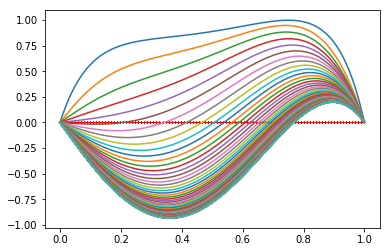

In [4]:
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
# le pas h
N=100
h=1/(N+1)
dt=0.01
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=(1/dt+2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#donnee initiale
U=ones(N)
#boucle en temps
for n in range(int(1/dt)):
    t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
    #terme source dépend de t
    SM=F+U/dt
    #resolution du systeme creux
    U=spsolve(A,SM)
    #Ajout des CL de Dirichlet
    U_avec_CL=zeros(N+2)
    U_avec_CL[1:N+1]=U
    plot(x_avec_CL,U_avec_CL)
    #On rajoute les points de discrétisation sur l'axe des abscisses.
    scatter(x,0*x,[0.1],'red')

## Mise en oeuvre du schéma d'Euler explicite
On choisit de reprendre les différences finies centrées comme discrétisation spatiale. On doit vérifier la stabilité sous la CFL
$$
\delta t\le \frac {h^2} 2.
$$
Dans le code qui suit, modifier le coefficient CFL pour observer la stabilité ou l'instabilité. Dans le cas de l'instabilité, réduire le temps final afin d'observer la naissance de l'instabilité.

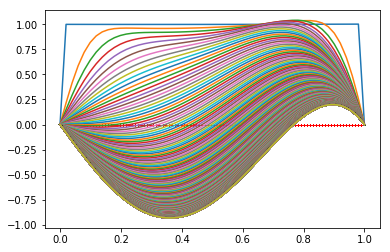

In [3]:
# le pas h
N=100
h=1/(N+1)
CFL=0.999
#CFL=1.001
dt=CFL*0.5*h**2
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#donnee initiale
U=ones(N)
#boucle en temps
for n in range(int(1/dt)):
    t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
    #terme source dépend de t
    #iteration explicite du schéma
    U=U+dt*(F-A@U)
    if (n%50==0):
        #Ajout des CL de Dirichlet
        U_avec_CL=zeros(N+2)
        U_avec_CL[1:N+1]=U
        plot(x_avec_CL,U_avec_CL)
        #On rajoute les points de discrétisation sur l'axe des abscisses.
        scatter(x,0*x,[0.1],'red')

## Estimation d'erreur
Mettre en oeuvre une validation de l'erreur en temps et en espace. Les schémas proposés étant d'ordre 1 en temps et 2 en espace.
## Schéma de Cranck-Nickolson
Ce schéma en temps, pour l'équation de la chaleur 1D sans terme source, s'écrit,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A \frac {V^{n}+V^{n+1}}{2}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t,
\end {align}
$$
avec la matrice $A$ définie précédemment pour la disctrétisation spatiale par différence finie. 
### Ordre du schéma
Montrer que ce schéma est d'ordre 2 en temps et en espace.
### Stabilité
Montrer que ce schéma est inconditionellement stable $L^2$.
### Mise en oeuvre
Mettre en oeuvre ce schéma pour $v_0=\chi_{[\frac L 3, \frac L 2]}$.
Qu'observe-t-on pour de grand pas de temps au voisinage des discontinuités de la donnée initiale? Cela contredit-il le résultat de stabilité?

Vérifier l'ordre de la méthode pour une donnée initiale régulière de votre choix.

# La chaleur 2D
L'objectif ici est d'étendre les simulations numériques obtenus en dimension 1 à la dimension 2 sur un rectangle $\Omega=]0,L[\times]0,H[$.